# Demo: Using VGG with Keras

Below, you'll be able to check out the predictions from an ImageNet pre-trained VGG network with Keras.

### Load some example images

['images/zebra.jpg', 'images/dog_labrador.jpg', 'images/elephant.jpg']


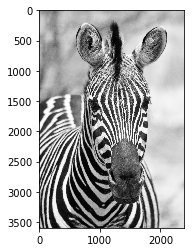

In [2]:
# Load our images first, and we'll check what we have
from glob import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

image_paths = glob('images/*.jpg')

# Print out the image paths
print(image_paths)

# View an example of an image
example = mpimg.imread(image_paths[0])
plt.imshow(example)
plt.show()

### Pre-process an image
Note that the `image.load_img()` function will re-size our image to 224x224 as desired for input into this VGG16 model, so the images themselves don't have to be 224x224 to start.

In [5]:
# Here, we'll load an image and pre-process it
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

i = 0 # Can change this to your desired image to test
img_path = image_paths[i]
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

### Load VGG16 pre-trained model
We won't throw out the top fully-connected layer this time when we load the model, as we actually want the true ImageNet-related output. However, you'll learn how to do this in a later lab. The inference will be a little slower than you might expect here as we are not using GPU just yet.

Note also the use of `decode_predictions` which will map the prediction to the class name.

In [ ]:
# Note - this will likely need to download a new version of VGG16
from keras.applications.vgg16 import VGG16, decode_predictions

# Load the pre-trained model
model = VGG16(weights='imagenet')

# Perform inference on our pre-processed image
predictions = model.predict(x)

# Check the top 3 predictions of the model
print('Predicted:', decode_predictions(predictions, top=3)[0])

Instructions for updating:
Colocations handled automatically by placer.
309051392/553467096 [===============>..............] - ETA: 49:18

In [ ]:
You should mostly get the correct answers here. In our own run, it predicted a Tusker elephant with an African elephant in second place (the image is of an African elephant), correctly selected a labrador, and very confidently predicted a zebra. You can add some of your own images into the `images/` folder by clicking on the jupyter logo in the top left and see how it performs on your own examples!